# ARIMA MODEL

To perform ARIMA analyses and predict the temperature values for the next five years in Delhi.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path = r"C:\Users\sidiq\Emiritus\city_temperature.csv"

In [3]:
df_1= pd.read_csv(file_path)
print(df_1.head(3))
print('--------------------------------------------------')
print(' shape of df_1= ', df_1.shape)

C:\Users\sidiq\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


   Region  Country State     City  Month  Day  Year  AvgTemperature
0  Africa  Algeria   NaN  Algiers      1    1  1995            64.2
1  Africa  Algeria   NaN  Algiers      1    2  1995            49.4
2  Africa  Algeria   NaN  Algiers      1    3  1995            48.8
--------------------------------------------------
 shape of df_1=  (2906327, 8)


In [4]:
# df_1['City'].unique()
# df_1['Country'].unique()

In [5]:
# Create a sub dataframe for temperature in delhi
delhi = df_1[(df_1['Country'] == 'India') & (df_1['City'] == 'Delhi')]

In [6]:
delhi.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
340321,Asia,India,NaN,Delhi,1,1,1995,50.7
340322,Asia,India,NaN,Delhi,1,2,1995,52.1
340323,Asia,India,NaN,Delhi,1,3,1995,53.8
340324,Asia,India,NaN,Delhi,1,4,1995,53.7
340325,Asia,India,NaN,Delhi,1,5,1995,54.5


In [7]:
delhi.tail()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
349581,Asia,India,NaN,Delhi,5,8,2020,89.9
349582,Asia,India,NaN,Delhi,5,9,2020,92.3
349583,Asia,India,NaN,Delhi,5,10,2020,81.9
349584,Asia,India,NaN,Delhi,5,11,2020,84.7
349585,Asia,India,NaN,Delhi,5,12,2020,88.1


In [8]:
delhi.shape

(9265, 8)

In [9]:
delhi.isnull().sum()

Region               0
Country              0
State             9265
City                 0
Month                0
Day                  0
Year                 0
AvgTemperature       0
dtype: int64

In [10]:
# Reset Index
delhi = delhi.reset_index(drop=True)

In [11]:
delhi.head(2)

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Asia,India,NaN,Delhi,1,1,1995,50.7
1,Asia,India,NaN,Delhi,1,2,1995,52.1


Text(0, 0.5, 'AvgTemperature')

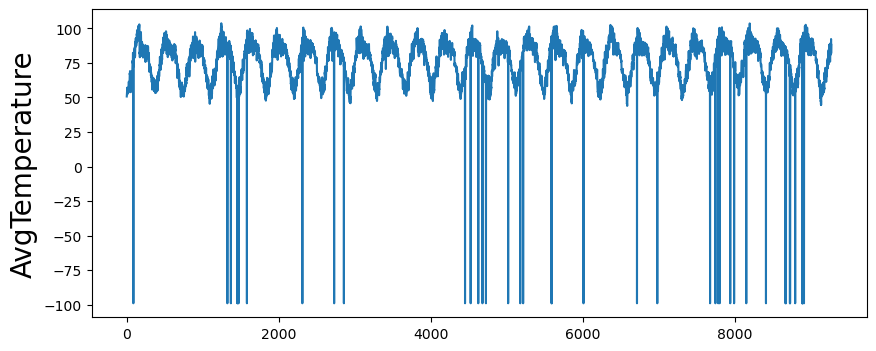

In [12]:
plt.figure(figsize=(10,4))
plt.plot(delhi['AvgTemperature'])
plt.ylabel("AvgTemperature",fontsize = 20)

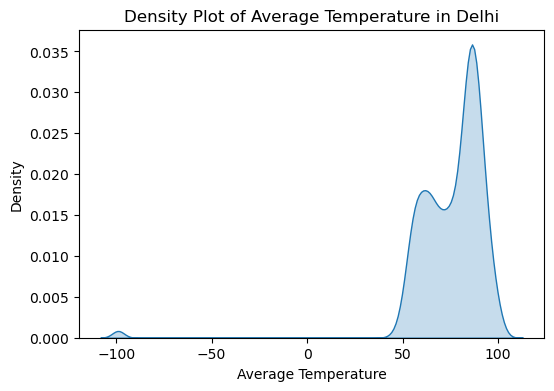

In [13]:
# Distribution of data

# Plotting the density diagram (Kernel Density Estimate plot)
plt.figure(figsize=(6, 4))
sns.kdeplot(delhi['AvgTemperature'], fill=True)
plt.title('Density Plot of Average Temperature in Delhi')
plt.xlabel('Average Temperature')
plt.ylabel('Density')
plt.show()

In [14]:
#Skewness of data
skewness = delhi['AvgTemperature'].skew()

# Checking if the data is skewed
if skewness > 1 or skewness < -1:
    skew_description = "highly skewed"
elif 0.5 <= skewness <= 1 or -1 <= skewness <= -0.5:
    skew_description = "moderately skewed"
else:
    skew_description = "approximately symmetric"

print("Skewness: ", skewness)
print("Description: ", skew_description)

Skewness:  -4.834065909887745
Description:  highly skewed


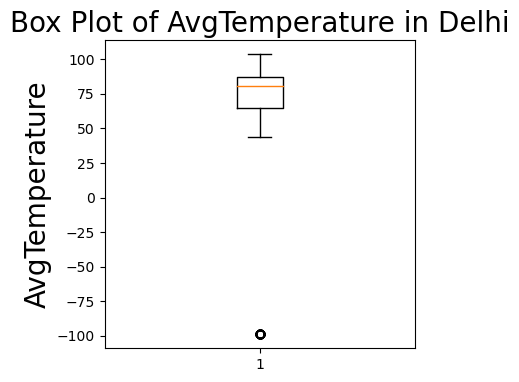

In [15]:
# To check Outliers
# Creating a box plot
plt.figure(figsize=(4, 4))
plt.boxplot(delhi['AvgTemperature'])
plt.ylabel("AvgTemperature", fontsize=20)
plt.title("Box Plot of AvgTemperature in Delhi", fontsize=20)
plt.show()

In [16]:
# Identifying outliers
Q1 = delhi['AvgTemperature'].quantile(0.25)
Q3 = delhi['AvgTemperature'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = delhi[(delhi['AvgTemperature'] < lower_bound) | (delhi['AvgTemperature'] > upper_bound)]

# Displaying outliers
outliers

,Region,Country,State,City,Month,Day,Year,AvgTemperature
87,Asia,India,NaN,Delhi,3,29,1995,-99.0
1323,Asia,India,NaN,Delhi,8,16,1998,-99.0
1369,Asia,India,NaN,Delhi,10,1,1998,-99.0
1453,Asia,India,NaN,Delhi,12,24,1998,-99.0
1454,Asia,India,NaN,Delhi,12,25,1998,-99.0
1459,Asia,India,NaN,Delhi,12,30,1998,-99.0
1460,Asia,India,NaN,Delhi,12,31,1998,-99.0
1470,Asia,India,NaN,Delhi,1,10,1999,-99.0
1579,Asia,India,NaN,Delhi,4,29,1999,-99.0
1580,Asia,India,NaN,Delhi,4,30,1999,-99.0


In [17]:
# -99 looks like a wrong entry
# replace -99 with nan
delhi['AvgTemperature'].replace(-99,np.nan,inplace =True)

In [18]:
# Check skewness again
# we will use skewness to find wether we need to replace nan with mean or median

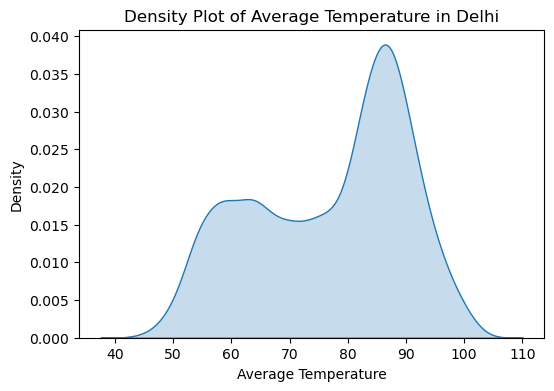

In [19]:
# Density Plot after replacing outlier with nan
# Plotting the density diagram (Kernel Density Estimate plot)
plt.figure(figsize=(6,4))
sns.kdeplot(delhi['AvgTemperature'], fill=True)
plt.title('Density Plot of Average Temperature in Delhi')
plt.xlabel('Average Temperature')
plt.ylabel('Density')
plt.show()

In [20]:
skewness = delhi['AvgTemperature'].skew()

# Checking if the data is skewed
if skewness > 1 or skewness < -1:
    skew_description = "highly skewed"
elif 0.5 <= skewness <= 1 or -1 <= skewness <= -0.5:
    skew_description = "moderately skewed"
else:
    skew_description = "approximately symmetric"

print("Skewness: ", skewness)
print("Description: ", skew_description)


Skewness:  -0.3701248347502511
Description:  approximately symmetric


In [21]:
# Approximately symmetric so we replace nan with mean

In [22]:
# nan in present data
delhi['AvgTemperature'].isnull().sum()

60

In [23]:
#mean of present data
delhi['AvgTemperature'].mean()

76.93822922324856

In [24]:
# Replace nan with mean 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Reshape the data since we are imputing for a single column
delhi['AvgTemperature'] = imputer.fit_transform(delhi['AvgTemperature'].values.reshape(-1, 1))


In [25]:
delhi['AvgTemperature'].isnull().sum()

0

In [26]:
delhi['AvgTemperature'].mean()

76.93822922324851

Text(0, 0.5, 'AvgTemperature')

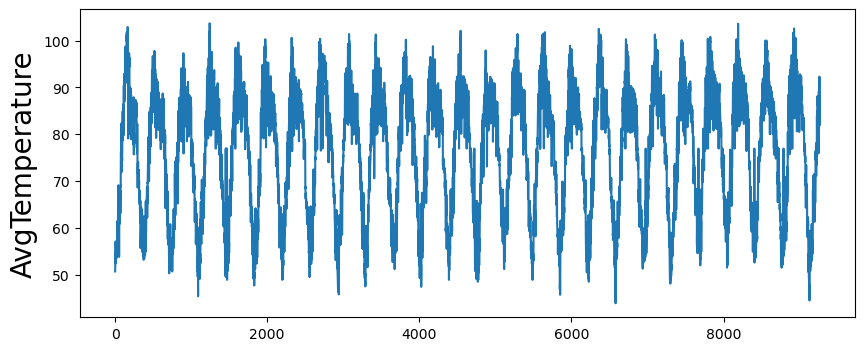

In [27]:
plt.figure(figsize=(10,4))
plt.plot(delhi['AvgTemperature'])
plt.ylabel("AvgTemperature",fontsize = 20)

In [28]:
# Testing for stationary
from statsmodels.tsa.stattools import adfuller

In [29]:
test_result = adfuller

In [30]:
# H0 = It is non stationary
# H0 = It is stationary

def adfuller_test(Export):
    result = adfuller(Export)
    labels = ['ADF Test Statistics', 'p value', '#Lags Used', 'Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+':'+str(value))
    if result[1]<=0.05:
        print('Reject H0: It is stationary')
    else:
        print('Accept H0: It is non stationary')

In [31]:
adfuller_test(delhi['AvgTemperature'])

ADF Test Statistics:-8.786101777647525
p value:2.3064322634278694e-14
#Lags Used:38
Number of Observations Used:9226
Reject H0: It is stationary


In [35]:
# PLOT PACF

In [32]:
from statsmodels.graphics.tsaplots import plot_pacf

C:\Users\sidiq\miniconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


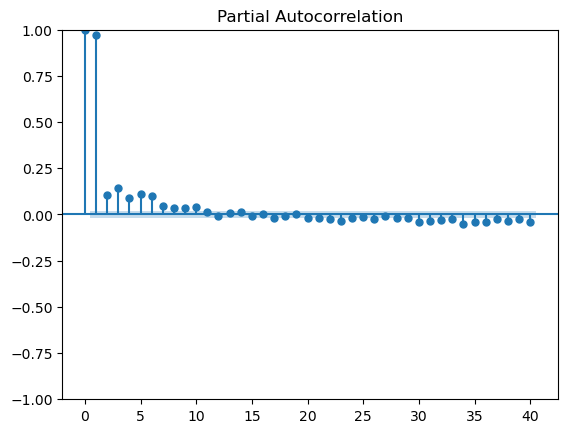

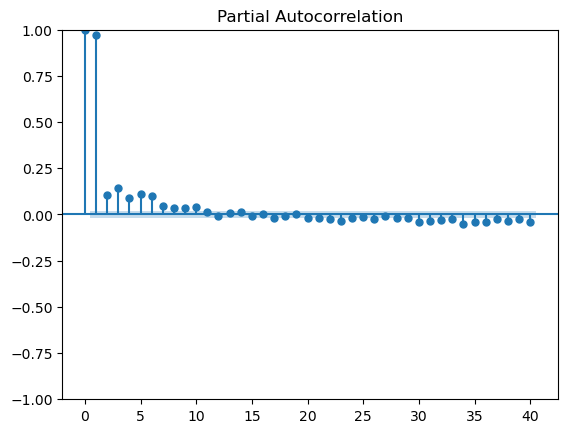

In [40]:
plot_pacf(delhi['AvgTemperature'])

In [34]:
# Use auto arima to find model

In [35]:
from pmdarima import auto_arima

In [36]:
# Define independent features

model = auto_arima(delhi['AvgTemperature'],  seasonal=False)  

# Summary of the model
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 9265
Model:               SARIMAX(3, 0, 1)   Log Likelihood              -23049.531
Date:                Mon, 29 Jan 2024   AIC                          46111.063
Time:                        18:09:35   BIC                          46153.867
Sample:                             0   HQIC                         46125.607
                               - 9265                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2048      0.047      4.398      0.000       0.114       0.296
ar.L1          1.5916      0.018     88.457      0.000       1.556       1.627
ar.L2         -0.6680      0.016    -41.155      0.0

In [37]:
model

ARIMA(order=(3, 0, 1), scoring_args={}, suppress_warnings=True)

In [36]:
# Fit SARIMA(3,0,1)

In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [39]:
model = SARIMAX(delhi['AvgTemperature'], order=(3, 0, 1))

In [40]:
results = model.fit()

In [41]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         AvgTemperature   No. Observations:                 9265
Model:               SARIMAX(3, 0, 1)   Log Likelihood              -23063.292
Date:                Wed, 31 Jan 2024   AIC                          46136.584
Time:                        11:38:16   BIC                          46172.254
Sample:                             0   HQIC                         46148.704
                               - 9265                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6026      0.016     97.694      0.000       1.570       1.635
ar.L2         -0.6763      0.015    -44.525      0.000      -0.706      -0.646
ar.L3          0.0736      0.008      8.785      0.000       0.057       0.090
ma.L1         -0.7834      0.016    -49.353      0.000      -0.815      -0.752
sigma2         8.4993      0.074    114.906      0.000       8.354       8.644
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             12434.97
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                            -0.29
Prob(H) (two-sided):                  0.29   Kurtosis:                         8.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
# Forecast the next year's average temperature
forecast = results.get_forecast(steps=1)

# Get the forecast mean
predicted_avg_temp = forecast.predicted_mean

# Optionally, get the confidence intervals of the forecasts
conf_int = forecast.conf_int()

print("Predicted AvgTemperature for next year:", predicted_avg_temp)
print("Confidence intervals for the forecast:", conf_int)


Predicted AvgTemperature for next year: 9265    87.782684
dtype: float64
Confidence intervals for the forecast:       lower AvgTemperature  upper AvgTemperature
9265             82.068682             93.496685


In [44]:
# Forecast the next year's average temperature
forecast = results.get_forecast(steps=365)

# Get the forecast mean
predicted_avg_temp = forecast.predicted_mean

# Optionally, get the confidence intervals of the forecasts
conf_int = forecast.conf_int()

print("Predicted AvgTemperature for next year:", predicted_avg_temp)
print("Confidence intervals for the forecast:", conf_int)

Predicted AvgTemperature for next year: 9265    87.782684
9266    87.334818
9267    87.081718
9268    86.955627
9269    86.891770
          ...    
9625    82.096207
9626    82.083219
9627    82.070233
9628    82.057249
9629    82.044268
Name: predicted_mean, Length: 365, dtype: float64
Confidence intervals for the forecast:       lower AvgTemperature  upper AvgTemperature
9265             82.068682             93.496685
9266             79.948137             94.721500
9267             78.847747             95.315690
9268             78.162700             95.748554
9269             77.655198             96.128341
...                    ...                   ...
9625             33.024701            131.167713
9626             32.948981            131.217458
9627             32.873362            131.267104
9628             32.797845            131.316654
9629             32.722429            131.366106

[365 rows x 2 columns]
